## Simple Linear Regression

Linear regression is  a linear or straight line relationship between the input variables (X) and the single output variable (y).

<img src='images/lr.png' width="45%"/>

### Let us consider a dataset where we have a value of response y for every feature x:

In [ ]:
import numpy as np

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

### x as a feature vector and y as a response vector

In [ ]:
#x = np.array([1,2,3,4,5])
#y =  np.array([5,4,6,5,6])

### A scatter plot of above dataset looks like:-

In [ ]:

import matplotlib.pyplot as plt
#from matplotlib import style
#style.use('ggplot')

plt.scatter(x,y,color='red')

# putting labels
plt.xlabel('x')
plt.ylabel('y')
plt.show()


#### Now, the task is to find a line which fits best in above scatter plot so that we can predict the response for any new feature values. (i.e a value of x not present in dataset)

- This line is called regression line.

<img src="images/lin_reg.PNG" width="20%"/>
<img src="images/bfind.PNG" width="90%"/>

In [ ]:
### find m and b

In [ ]:
def best_fit_slope(x,y):
    m= (((np.mean(x)*np.mean(y))-np.mean(x*y))/
        ((np.mean(x)**2)-np.mean(x**2)))
    b = np.mean(y) - m*np.mean(x)
   
    return m,b

In [ ]:
m,b = best_fit_slope(x,y)
print m,b

In [ ]:
regression_line = [(m*i+b) for i in x]
#regression_line


In [ ]:
predict_x=15
#y=mx+b
predict_y=(m*predict_x)+b
print predict_y

In [ ]:
# for visualization
import matplotlib.pyplot as plt
plt.scatter(x,y,color='red')
#plt.scatter(predict_x,predict_y,color='green')
plt.plot(x, regression_line)
# putting labels
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### R^2 (coefficient of determination):regression score function.


- The R^2 (or R Squared) metric provides an indication
  of the goodness of fit of a set of predictions to the
  actual values. In statistical literature,
  this measure is called the coefficient of determination.

- a model fits the data well if the differences between the
  observed values and the model's predicted values are small.

- R-squared is a statistical measure of how close the data
  are  to the fitted regression line.

- the higher the R-squared, the better the model fits your
  data.

- value between 0 and 1 

- The distance between the regression line's y values,
  and the data's y values is the error, then we square that. 


<img src='images/r2.PNG' width='40%'/>

### 1-((sum of the squared error of the line) / (sum of squared error of the y mean))

- **SE line** = (y1-(mx1+b))+(y2-(mx2+b))+.....(yn-(mxn+b))


- **SE y mean** = (y1-mean(y))+(y2-mean(y))+....(yn-mean(y))

if SE line is small ==> line is a good fit or r^2 close to 1

if SE line is large ===> r^2 close to 0 (i.e line is not fitted well)



<img src="rsq.png" />

In [ ]:
def squared_error(ys_original,ys_line):
    return sum((ys_line-ys_original)**2)

In [ ]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [np.mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [ ]:
r_squared = coefficient_of_determination(y,regression_line)
print(r_squared)

### Now Using scikit-learn...

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
x_new=x.reshape(-1,1)

In [ ]:
x_new.ndim

In [ ]:
lg = LinearRegression()
lg.fit(x_new,y)

In [ ]:
print lg.coef_
lg.intercept_

In [ ]:
t=np.array([10,12])
t.ndim

In [ ]:
r=np.array([[10],[12]])
r.shape


In [ ]:
t=t.reshape(-1,1)
t.shape

In [ ]:
#v=np.array([10,2]).reshape(-1,1)
y_predict = lg.predict(t)

In [ ]:
y_predict

In [ ]:
print lg.coef_
print lg.intercept_

In [ ]:
y_pred=lg.predict(x_new)
r2_score(y,y_pred)

In [ ]:
y_pred

In [ ]:
y_pre = lg.predict(15)

In [ ]:
y_pre

### Take another example

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('dataset/Salary_Data.csv')

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.shape

(30, 2)

In [5]:
X = data.iloc[:,0].values
X[:5]

array([1.1, 1.3, 1.5, 2. , 2.2])

In [6]:
y = data['Salary'].values
y[:5]

array([39343., 46205., 37731., 43525., 39891.])

In [7]:
#training data
X_t=X[:25]
y_t=y[:25]

#testing data
X_ts = X[25:]
y_ts = y[25:]

In [11]:
#print X_t.shape
print X_ts.ndim

1


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=5,random_state=4)

In [14]:
from sklearn.linear_model import LinearRegression

In [17]:
X_new=X_train.reshape(-1,1)

In [19]:
lin_reg.coef_

array([9355.0512614])

In [20]:
lin_reg.intercept_

26496.521027391493

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_train.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
y_pred = lin_reg.predict(X_test.reshape(-1,1))

In [23]:
r2_score(y_test,y_pred)

0.9573315403325658

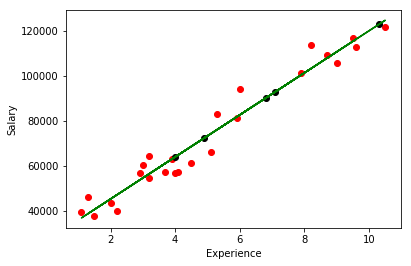

In [24]:
plt.scatter(X_train,y_train,color='red')   #training data
#plt.scatter(X_test,y_test,color='blue')   #testing data
plt.scatter(X_test,y_pred,color='black')   #testing data
plt.plot(X_train,lin_reg.predict(X_train.reshape(-1,1)),color='green')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [25]:
y_test,X_test

(array([ 55794.,  98273., 122391.,  67938.,  91738.]),
 array([ 4. ,  7.1, 10.3,  4.9,  6.8]))

In [27]:
y_pred

array([ 63916.726073  ,  92917.38498335, 122853.54901984,  72336.27220827,
        90110.86960493])

In [26]:
x

NameError: name 'x' is not defined

In [ ]:
x.reshape(10,1).ndim